In [66]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LableEncoder
from sklearn.linear_model import logisticRegression
import pickle

ModuleNotFoundError: No module named 'missingno'

In [67]:
data=pd.read_csv("D:\\NMGTR\kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

In [ ]:
data.columns=['age','blood_pressure','specfic_gravity','albumin',
              'suger','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucous random','blood_urea','serum_ creatinine','sodium','potassium',
              'hemoglobin','packed_cell_valume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [69]:
data.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [73]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

KeyError: 'blood glucose random'

In [74]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertention'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabatesmellitus'].fillna(data['diabatesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

KeyError: 'hypertension'

In [75]:
catcols=set(data.dtypes[data.dtypes=='0'].index.values)# only fetch the object type column
print(catcols)

set()


In [76]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i])) # using counter for number of classes in the column
    print('*'*120+'\n')

In [77]:
catcols.remove('red_blood_cells_count') # remove is used for removing a particular column
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

KeyError: 'red_blood_cells_count'

In [ ]:
#'specific_gravity','sugar'(as these columns are numerical it is removed)
catcols=['anemia','pedal_edema','appetite','class','coronary_artery_disease','diabetesmellit'
        'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']#only considered the text class columns

In [78]:
from sklearn.preprocessing import LabelEncoder # importing the LableEncoding fropm sklearn
for i in catcols: #looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LEi=LabelEncoder() #creting on object of LabelEncoder
    print(c(data[i]) #getting the classes values before transformation
    data[i]=LEi.fit_transform(data[i]) #transforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print("*"*100)

SyntaxError: invalid syntax (3302209179.py, line 6)

In [79]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)# only fetch the float and int type columns
#contcols=pd.DataFrame(data,column=contcols)
print(contcols)

{'pot', 'bu', 'pc', 'htn', 'appet', 'bp', 'classification', 'ane', 'rc', 'ba', 'pe', 'pcc', 'cad', 'sg', 'rbc', 'hemo', 'wc', 'su', 'pcv', 'sc', 'id', 'al', 'sod', 'age', 'dm', 'bgr'}


In [80]:
for i in contcols:
    print("Continous Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns: pot
Counter({5.0: 30, 3.5: 30, 4.9: 27, 4.7: 17, 4.8: 16, 4.0: 14, 4.2: 14, 4.1: 14, 3.8: 14, 3.9: 14, 4.4: 14, 4.5: 13, 3.7: 12, 4.3: 12, 3.6: 8, 4.6: 7, 3.4: 5, 5.2: 5, 5.7: 4, 5.3: 4, 3.2: 3, 5.5: 3, 2.9: 3, 5.4: 3, 6.3: 3, 3.3: 3, 2.5: 2, 5.8: 2, 5.9: 2, 5.6: 2, 3.0: 2, 6.5: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.4: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, 39.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 7.6: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 47.0: 1, nan: 1, 5.1: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2.8: 1, nan: 1, nan: 1, nan: 1, nan: 1, 2.7: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 

In [81]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)


KeyError: 'specific_gravity'

In [82]:
contcols.add('red_blood_cell_count')# using add we can add the column
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'pot', 'bu', 'pc', 'htn', 'appet', 'bp', 'classification', 'ane', 'rc', 'ba', 'pe', 'packed_cell_volume', 'pcc', 'cad', 'sg', 'rbc', 'hemo', 'white_blood_cell_count', 'wc', 'su', 'pcv', 'red_blood_cell_count', 'sc', 'id', 'al', 'sod', 'age', 'dm', 'bgr'}


In [83]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'sugar', 'albumin', 'specific_gravity'}


In [84]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')# replacing \tno wi
c(data['coronary_artery_disease'])

AttributeError: 'DataFrame' object has no attribute 'coronary_artery_disease'

In [85]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\type':'yes','yes':''})
c(data['diabetesmellitus'])

AttributeError: 'DataFrame' object has no attribute 'diabetesmellitus'

In [86]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,400.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.675000,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.022008,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

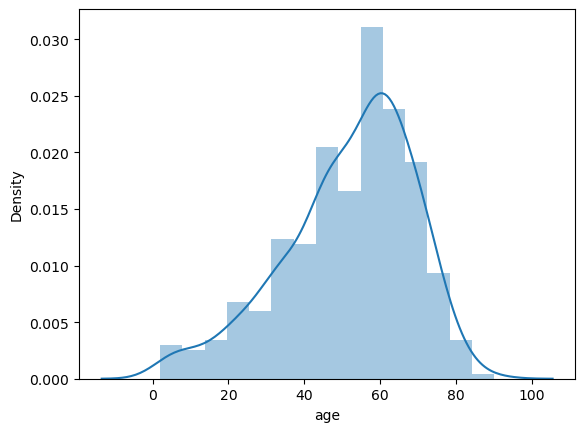

In [87]:
sns.distplot(data.age)

In [92]:
import matplotlib.pyplot as plt
figure=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
polt.title("age VS blood Scatter Plot")


KeyError: 'blood_pressure'

<Figure size 500x500 with 0 Axes>

TypeError: 'value' must be an instance of str or bytes, not a float

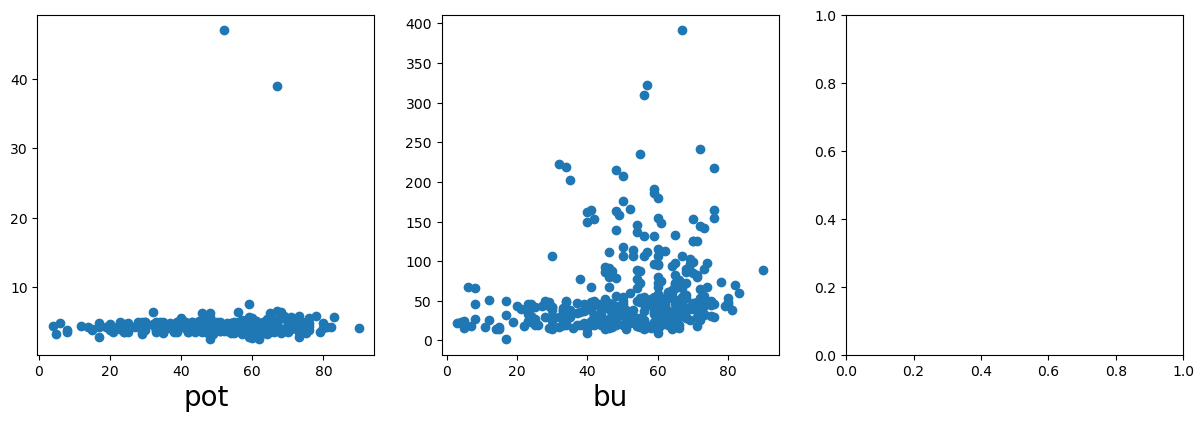

In [93]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1

for column in contcols:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.show()

In [94]:
f,sx=plt.sublots(figsize=(18,10))
sns.heartmap(data,corr(),annot=true,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'sublots'

In [95]:
sns.countplot(data['class'])

KeyError: 'class'

In [96]:
from sklearn.preprocessing import Standerdscaler
sc=StanederdScaler(
x_bal=sc.fit_transformx())

ImportError: cannot import name 'Standerdscaler' from 'sklearn.preprocessing' (C:\Users\cslab\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\__init__.py)

In [97]:
selcols=['red_blood_cells','pus_cells','blood glucose random','blood_urea',
'pedal_edema','anemia','diabetesmellitus','coranaory_artery_disease']
x=pd.DataFrame(data,coloumns=selcous)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape

SyntaxError: unexpected EOF while parsing (66649143.py, line 6)

In [98]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import dense

ModuleNotFoundError: No module named 'tensorflow'

In [99]:
classification=Sequential()
classification.add(Denes(30.activation='relu'))
classification.add(Denes(128.activation='relu'))
classification.add(Denes(64.activation='relu'))
classification.add(Denes(32.activation='relu'))
classification.add(Denes(1.activation='relu'))


SyntaxError: invalid syntax (3074107465.py, line 2)

In [100]:
calsification.combile(optimizer='admin',loss='binary_crossentqry',metrics=['accuracy'])



classification.fit(x_train,y_train.batch_size=10,validation_split=0.2,epochs=100)


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4041003033.py, line 5)

In [101]:
from sklearn.ensemble import RandamForestClassifier
rfc=RandamForest(n_estimators=10,criterion='entroy')

ImportError: cannot import name 'RandamForestClassifier' from 'sklearn.ensemble' (C:\Users\cslab\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\__init__.py)

In [ ]:
rfc.fit(x_train)


y_predict=rfc.predict(x_test)

In [102]:
from sklearn.linear_model import LogicticsRegestration
lgr=LogisticRegestration()
lgr.fit(x_train,y_train)



LogiesticRegistration()


ImportError: cannot import name 'LogicticsRegestration' from 'sklearn.linear_model' (C:\Users\cslab\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\__init__.py)

In [103]:
from sklearn.metrics import accuracy_score,classification_report
y_predict=lgr.predict(x_test)

NameError: name 'lgr' is not defined

In [104]:
classification.save("{ckd.hs}")
y_pred=classification.predict(x_test)

NameError: name 'classification' is not defined

In [105]:
y_pred=(y_pred>0.5)
y_pred

NameError: name 'y_pred' is not defined

In [106]:
def predict_exit(sample_value):
    
    sample_value=np.array(sample_value)
    
    sample_value=sample_value.reshape(1.-1)
    
    sample_value=sc.tranceform(sample_values)

In [107]:
test=classification.preduct([[1,1,121,000000,36.0,0,0,1,0,]])
if test==1;
    print('prediction:high change of CKD!')
else;
print('prediction:low change of SKD.')

SyntaxError: invalid syntax (4046803472.py, line 2)

In [109]:
from sklearn import modle_selection 

ImportError: cannot import name 'modle_selection' from 'sklearn' (C:\Users\cslab\AppData\Roaming\Python\Python39\site-packages\sklearn\__init__.py)

In [ ]:
from sklearn.matrics import confusion_matrix
cm

In [110]:
plt.figure(figsize=(8,6))
sns.heatmap(cm.cmp='blues',annot=true,xticklabels=['no ckd,'ckd],yticklabls=['no ckd','ckd'])
plt.xlabl;e('predicted values')
        

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2193535374.py, line 2)